In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("/Users/sudhanvasavyasachi/Desktop/Projects/Hackathon micron/Data/final_train.csv")
test=pd.read_csv("/Users/sudhanvasavyasachi/Desktop/Projects/Hackathon micron/Data/final_test.csv")
val=pd.read_csv("/Users/sudhanvasavyasachi/Desktop/Projects/Hackathon micron/Data/final_val.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844033 entries, 0 to 844032
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   passenger_count    844033 non-null  int64  
 1   trip_distance      844033 non-null  float64
 2   duration           844033 non-null  int64  
 3   tolls              844033 non-null  int64  
 4   traffic_indicator  844033 non-null  int64  
 5   is_holiday         844033 non-null  int64  
 6   route_encoded      844033 non-null  float64
 7   VendorID_2         844033 non-null  float64
 8   RatecodeID_2       844033 non-null  float64
 9   RatecodeID_3       844033 non-null  float64
 10  RatecodeID_4       844033 non-null  float64
 11  RatecodeID_5       844033 non-null  float64
 12  payment_type_2     844033 non-null  float64
 13  payment_type_3     844033 non-null  float64
 14  payment_type_4     844033 non-null  float64
 15  pickup_day_1       844033 non-null  float64
 16  pi

In [20]:
X_train = train.drop('duration',axis=1)
y_train = train['duration']

X_val = val.drop('duration',axis=1)
y_val = val['duration']

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Make predictions on validation set
ridge_predictions = ridge_model.predict(X_val)

# Calculate metrics
ridge_r2 = r2_score(y_val, ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_predictions))

print(f'Ridge Regression R2 Score: {ridge_r2:.4f}')
print(f'Ridge Regression RMSE: {ridge_rmse:.4f}')

Ridge Regression R2 Score: 0.7342
Ridge Regression RMSE: 4.9039


In [32]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Train XGBoost model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = model.predict(X_val)

# Calculate metrics
xgb_r2 = r2_score(y_val, y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f'R2 Score: {xgb_r2:.4f}')
print(f'RMSE: {xgb_rmse:.4f}')

R2 Score: 0.8024
RMSE: 4.2281


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on validation set
rf_predictions = rf_model.predict(X_val)

# Calculate metrics
rf_r2 = r2_score(y_val, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))

print(f'Random Forest R2 Score: {rf_r2:.4f}')
print(f'Random Forest RMSE: {rf_rmse:.4f}')

Random Forest R2 Score: 0.7997
Random Forest RMSE: 4.2565


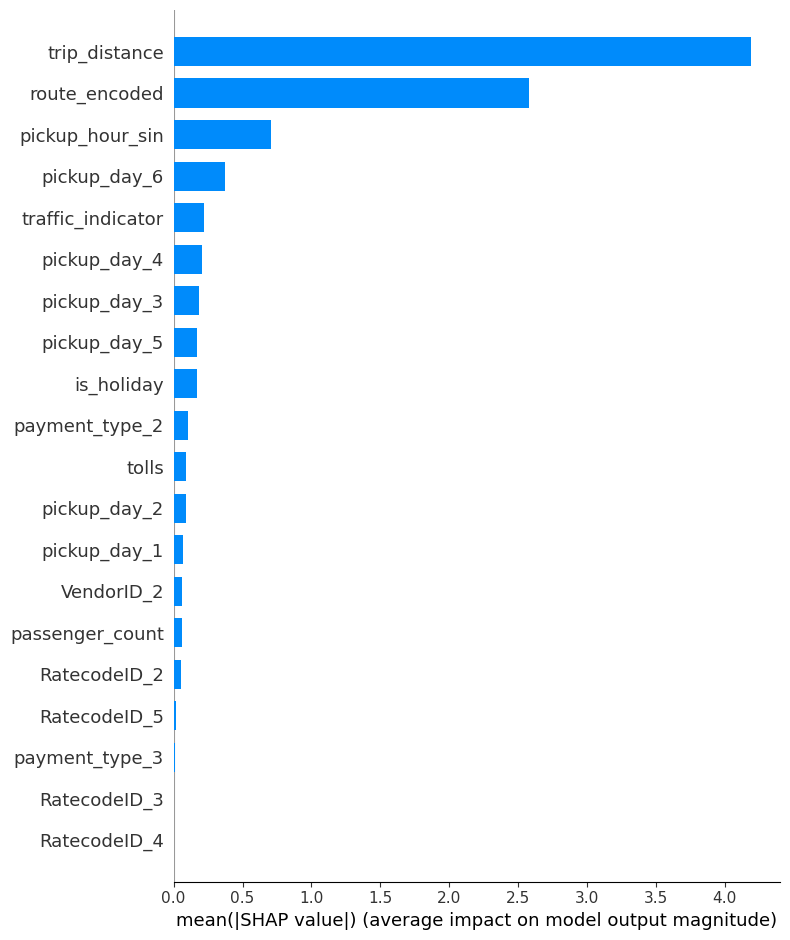

In [12]:
import shap

# Create explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for validation set
shap_values = explainer.shap_values(X_val)

# Create and show summary plot (feature importance bars)
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_val, plot_type="bar")

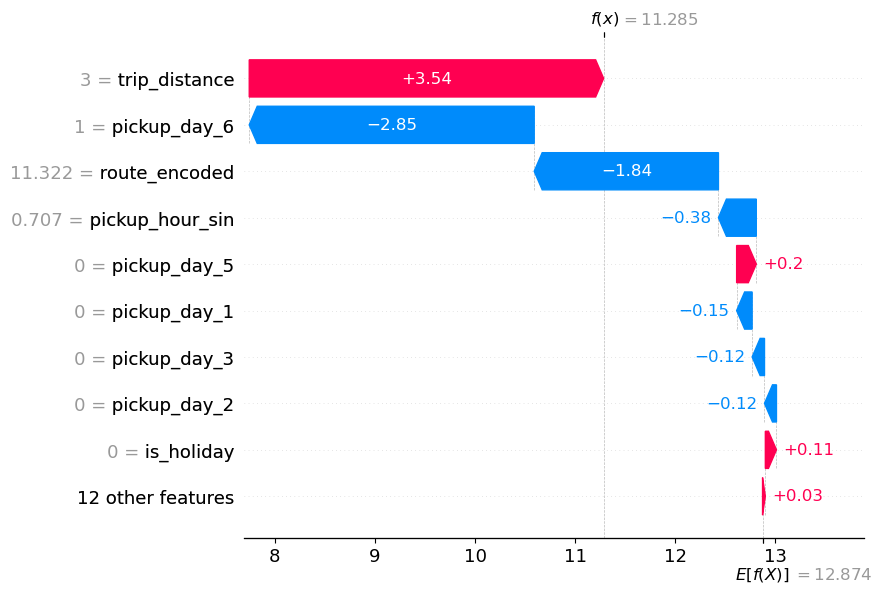

In [19]:
shap_expl = shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_val.iloc[0],
    feature_names=X_val.columns,
)
shap.plots.waterfall(shap_expl)

In [40]:
import pickle

# Save the XGBoost model using pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

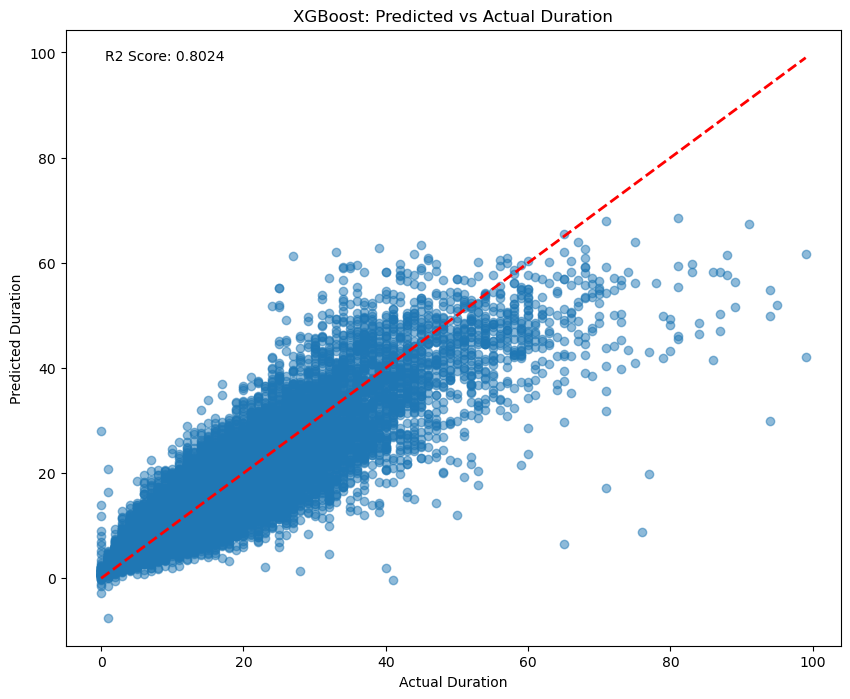

In [33]:
# Create scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('XGBoost: Predicted vs Actual Duration')

# Add R2 score to plot
plt.text(0.05, 0.95, f'R2 Score: {xgb_r2:.4f}', transform=plt.gca().transAxes)



plt.show()

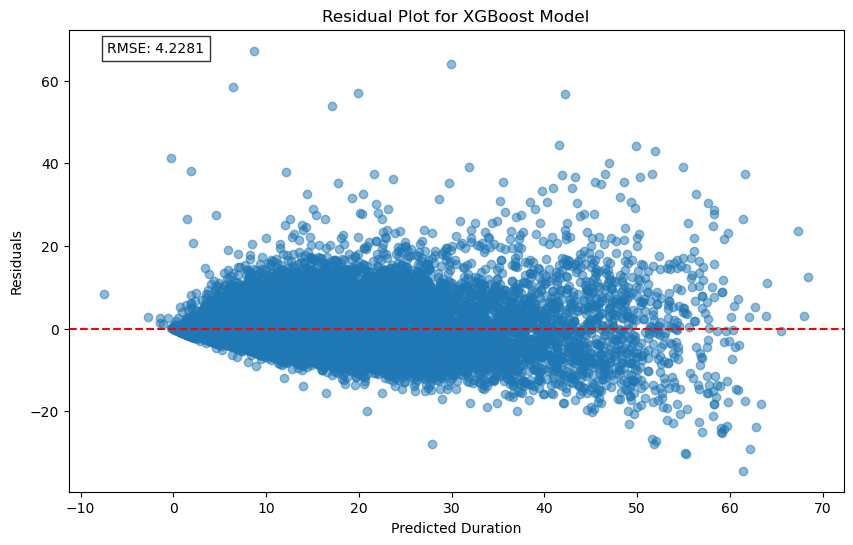

In [34]:
# Calculate residuals
residuals = y_val - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Duration')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBoost Model')

# Add text box with RMSE
plt.text(0.05, 0.95, f'RMSE: {xgb_rmse:.4f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

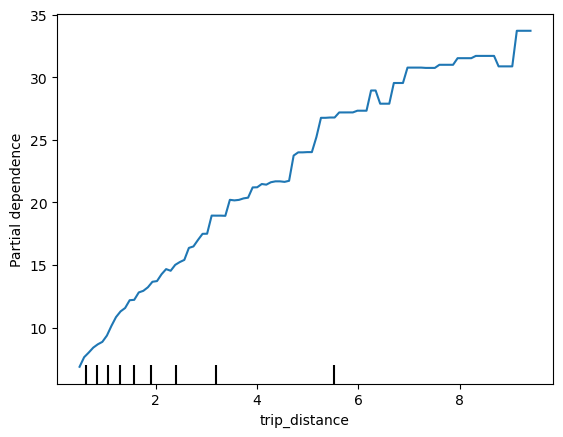

In [36]:
from sklearn.inspection import PartialDependenceDisplay

# Plot interaction between trip_distance and pickup_hour_sin
PartialDependenceDisplay.from_estimator(
    model, X_val, 
    features=[('trip_distance')],
    kind='average'
)